# Import Library


**Attribute Information:**

- **invoice_no:** Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.
- **customer_id:** Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.
- **gender:** String variable of the customer's gender.
- **age:** Positive Integer variable of the customer's age.
- **category:** String variable of the category of the purchased product.
- **quantity:** The quantities of each product (item) per transaction. Numeric.
- **price:** Unit price. Numeric. Product price per unit in Turkish Liras (TL).
- **payment_method:** String variable of the payment method (cash, credit card, or debit card) used for the transaction.
- **invoice_date:** Invoice date. The day when a transaction was generated.
- **shopping_mall:** String variable of the name of the shopping mall where the transaction was made.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')

# Data Loading and Exploration

## Loading the dataset

In [39]:
file = 'https://raw.githubusercontent.com/Ricle7/Data-Science-Playground/main/Customer%20Shopping%20Dataset%20-%20Retail%20Sales%20Data/customer_shopping_data.csv'
df = pd.read_csv(file)

## Displaying basic information (head, tail, shape, info, describe)

In [40]:
df.head(5) # Displaying the first 5 rows of the dataset

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [41]:
df.tail(5) # Displaying the last 5 rows of the dataset

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [42]:
df.shape  # Displaying the number of rows and columns in the dataset

(99457, 10)

In [43]:
df.shape  # Displaying the number of rows and columns in the dataset

(99457, 10)

In [44]:
df.info()  # Displaying information about the dataset, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [45]:
df.describe()  # Displaying summary statistics of the dataset

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [46]:
df.dtypes  # Displaying the data types of each column in the dataset

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

## Handling date column and checking for missing values

In [47]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')  # Converting 'invoice_date' to datetime format

In [48]:
df.dtypes  # Displaying the updated data types

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [49]:
df.isnull().sum() # Checking for missing values in the dataset

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

# Exploratory Data Analysis (EDA)

## Gender Distribution

In [50]:
df_gender = df['gender'].value_counts()  # Displaying the distribution of genders in the dataset
df_gender

Female    59482
Male      39975
Name: gender, dtype: int64

In [51]:
df['category'].nunique()  # Displaying the number of unique categories in the dataset

8

## Category Distribution

In [52]:
df_category = df['category'].value_counts()  # Displaying the distribution of categories in the dataset
df_category

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

## Gender and Category Orders

In [53]:
df_gender_order = df.groupby(['gender', 'category']).size().reset_index(name='count')  # Displaying gender and category orders
df_gender_order

,gender,category,count
0,Female,Books,2906
1,Female,Clothing,20652
2,Female,Cosmetics,9070
3,Female,Food & Beverage,8804
4,Female,Shoes,5967
5,Female,Souvenir,3017
6,Female,Technology,2981
7,Female,Toys,6085
8,Male,Books,2075
9,Male,Clothing,13835


In [54]:
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [55]:
df['age'].nunique()  # Displaying the number of unique ages in the dataset

52

In [56]:
df['quantity'].nunique()  # Displaying the number of unique quantities in the dataset

5

## Quantity Distribution

In [57]:
df_Quantity = df['quantity'].value_counts()  # Displaying the distribution of quantities in the dataset
df_Quantity

3    20149
5    19990
2    19828
1    19767
4    19723
Name: quantity, dtype: int64

In [58]:
df['payment_method'].nunique()  # Displaying the number of unique payment methods in the dataset

3

## Payment Method Distribution

In [59]:
df_payment = df['payment_method'].value_counts()  # Displaying the distribution of payment methods in the dataset
df_payment

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [60]:
df['shopping_mall'].nunique()  # Displaying the number of unique shopping malls in the dataset

10

## Shopping Mall Distribution

In [61]:
df_shopping = df['shopping_mall'].value_counts()  # Displaying the distribution of shopping malls in the dataset
df_shopping

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

## Gender and Payment Option

In [62]:
df_PG = df.groupby('gender')['payment_method'].value_counts().rename('count').reset_index()  # Displaying gender and payment option information
df_PG

,gender,payment_method,count
0,Female,Cash,26509
1,Female,Credit Card,21011
2,Female,Debit Card,11962
3,Male,Cash,17938
4,Male,Credit Card,13920
5,Male,Debit Card,8117


In [63]:
df['price'].nunique()# Displaying the number of unique prices in the dataset

40

## Price Statistics

In [64]:
print("The Max Price Is:", df['price'].max())  # Displaying the maximum price
print("The Min Price Is:", df['price'].min())  # Displaying the minimum price
print("The Mean Price Is:", df['price'].mean())  # Displaying the mean price

The Max Price Is: 5250.0
The Min Price Is: 5.23
The Mean Price Is: 689.2563209226097


## Max Prices per Category

In [65]:
df_category_M_price = df.groupby('category')['price'].max().reset_index()  # Displaying the maximum prices per category
df_category_M_price

,category,price
0,Books,75.75
1,Clothing,1500.40
2,Cosmetics,203.30
3,Food & Beverage,26.15
4,Shoes,3000.85
5,Souvenir,58.65
6,Technology,5250.00
7,Toys,179.20


## Total Prices per Category and Gender

In [66]:
df_category_price = df.groupby(['category', 'gender'])['price'].sum().reset_index()  # Displaying total prices per category and gender
df_category_price

,category,gender,price
0,Books,Female,132956.40
1,Books,Male,94020.90
2,Clothing,Female,18616663.12
3,Clothing,Male,12459021.52
4,Cosmetics,Female,1108432.26
5,Cosmetics,Male,740174.64
6,Food & Beverage,Female,137873.26
7,Food & Beverage,Male,93695.45
8,Shoes,Female,10746644.02
9,Shoes,Male,7388692.87


## Monthly Total Prices

In [67]:
df_date_price = df.groupby("invoice_date")['price'].sum().reset_index()  # Displaying monthly total prices
df_date_price.set_index('invoice_date', inplace=True)  # Setting 'invoice_date' as the index
df_date_price = df_date_price.resample('M').sum()  # Resampling to monthly frequency
df_date_price

,price
invoice_date,
2021-01-31,2656422.78
2021-02-28,2358636.34
2021-03-31,2618434.14
2021-04-30,2558825.62
2021-05-31,2662369.93
2021-06-30,2547239.73
2021-07-31,2802468.58
2021-08-31,2632303.32
2021-09-30,2530305.88


# Visualization

## Demographic Analysis

### Gender distribution pie chart

(-1.1015153127756405, 1.13183989631412, -1.20004782414819, 1.1047631658885573)

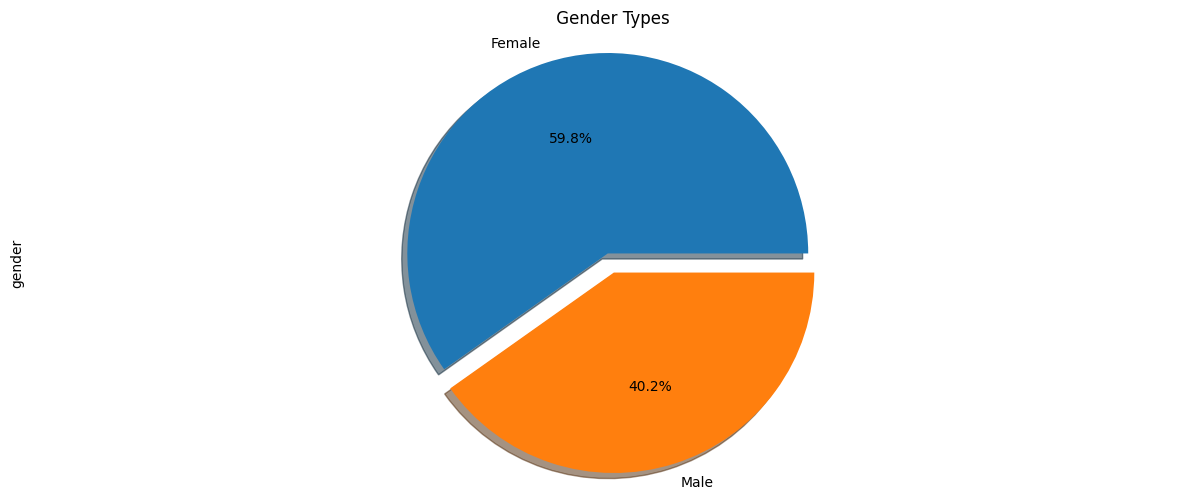

In [68]:
df_gender.plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',shadow=True,labels=['Female','Male'],explode=[0,0.1] )
plt.title('Gender Types')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle

### Age distribution histogram and box plot

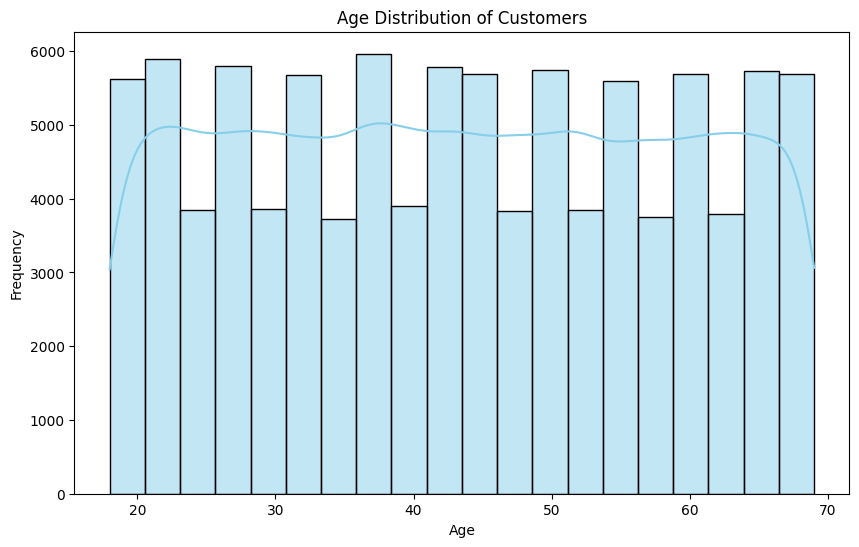

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

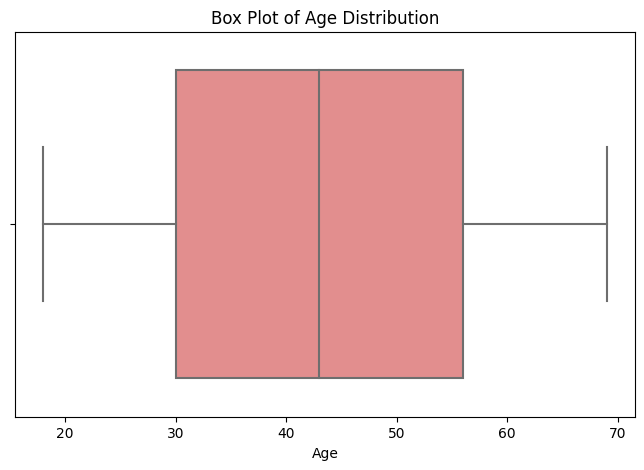

In [70]:
# Box Plot for Age Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'], color='lightcoral')
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.show()

## Product Analysis

### Category distribution pie chart

(-1.1023152793395266,
 1.1486208785872023,
 -1.1044316339702982,
 1.1930643172770745)

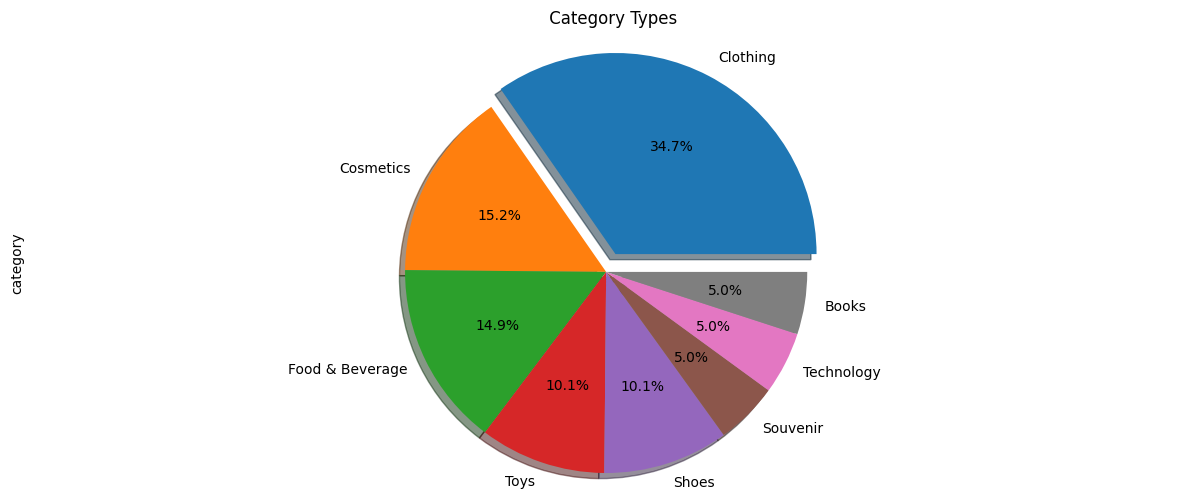

In [71]:
label=['Clothing','Cosmetics','Food & Beverage','Toys','Shoes','Souvenir','Technology','Books']
df_category.plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',shadow=True,labels=label,explode=[0.1,0,0,0,0,0,0,0] )
plt.title(' Category Types')
plt.axis('equal')

### Gender vs. category orders bar plot

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Cosmetics'),
  Text(3, 0, 'Food & Beverage'),
  Text(4, 0, 'Shoes'),
  Text(5, 0, 'Souvenir'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Toys')])

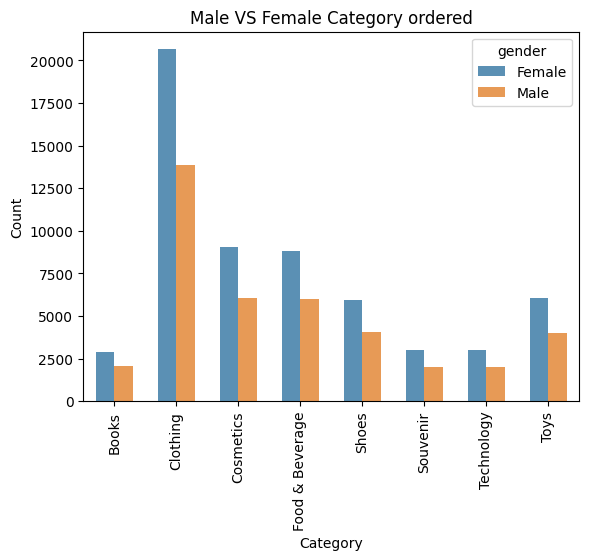

In [72]:
sns.barplot(data=df_gender_order,x='category',y='count',hue='gender',alpha=0.8,width=0.6)
plt.ylabel('Count')
plt.xlabel('Category')
plt.title('Male VS Female Category ordered')
plt.xticks(rotation=90)

### Quantity ordered pie chart

(-1.1040210219366893,
 1.184441786896453,
 -1.1007620571556869,
 1.1161634591527085)

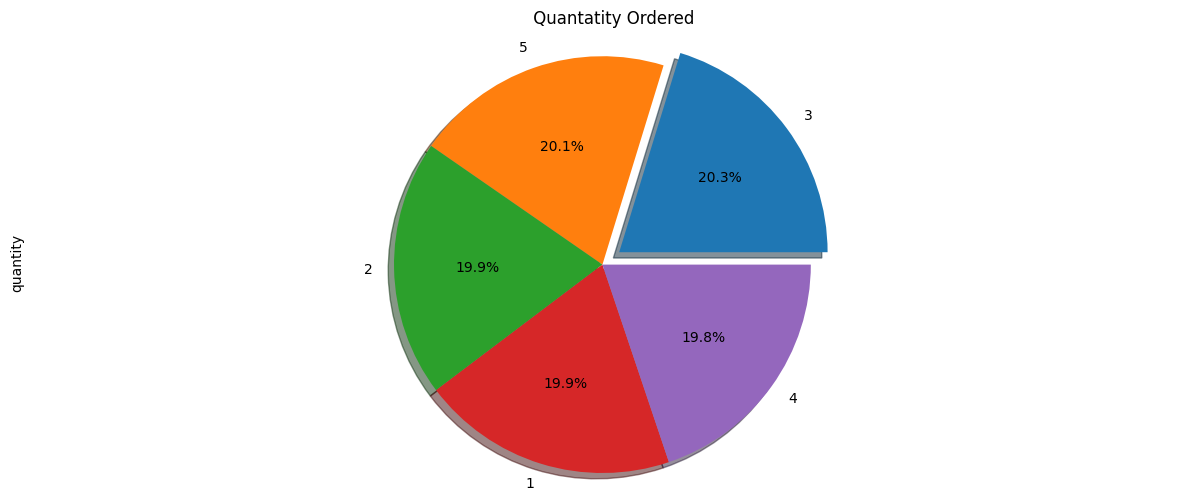

In [73]:
label=['3','5','2','1','4']
df_Quantity.plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',shadow=True,labels=label,explode=[0.1,0,0,0,0] )
plt.title(' Quantatity Ordered')
plt.axis('equal')

### Max price for each category bar plot

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Cosmetics'),
  Text(3, 0, 'Food & Beverage'),
  Text(4, 0, 'Shoes'),
  Text(5, 0, 'Souvenir'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Toys')])

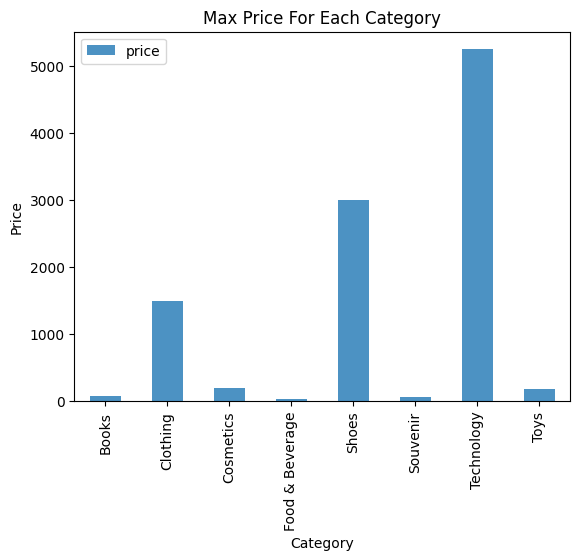

In [74]:
df_category_M_price.plot(kind='bar',x='category',y='price',alpha=0.8)
plt.ylabel('Price')
plt.xlabel('Category')
plt.title('Max Price For Each Category')
plt.xticks(rotation=90)

### Distribution of prices for each product category (Box and Violin plots)

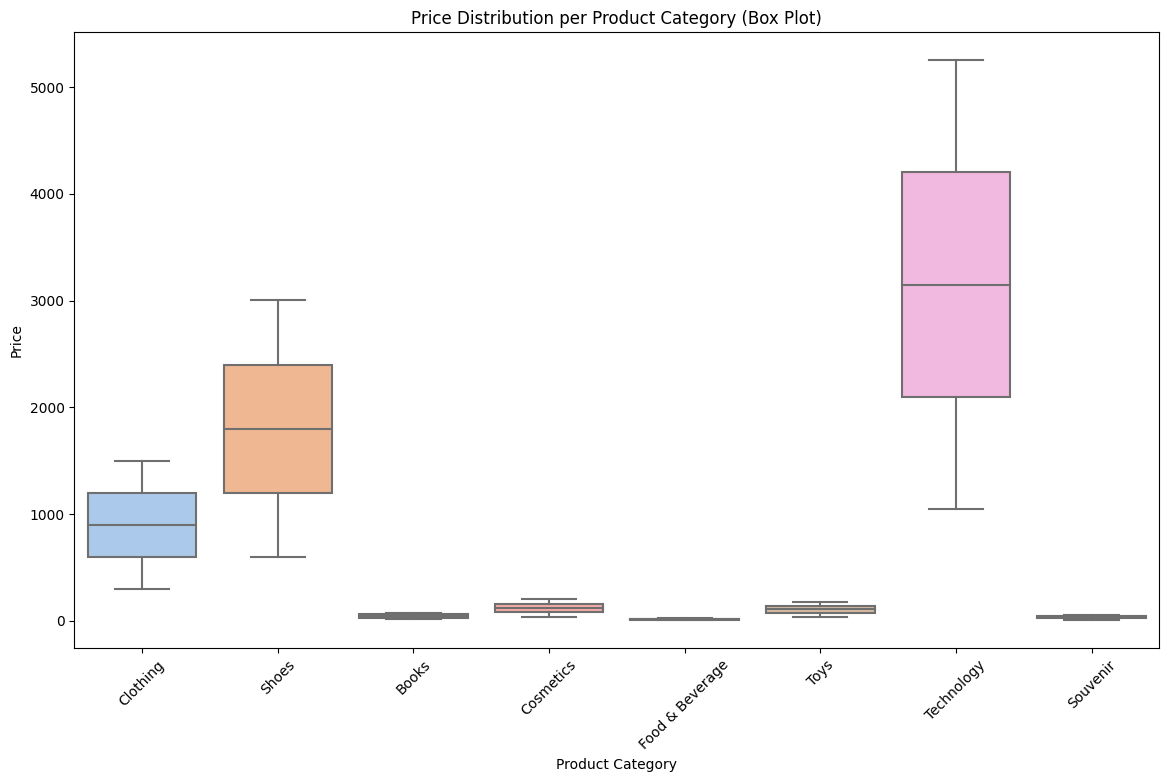

In [75]:
# Box plot for price distribution per category
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='price', data=df, palette='pastel')
plt.title('Price Distribution per Product Category (Box Plot)')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

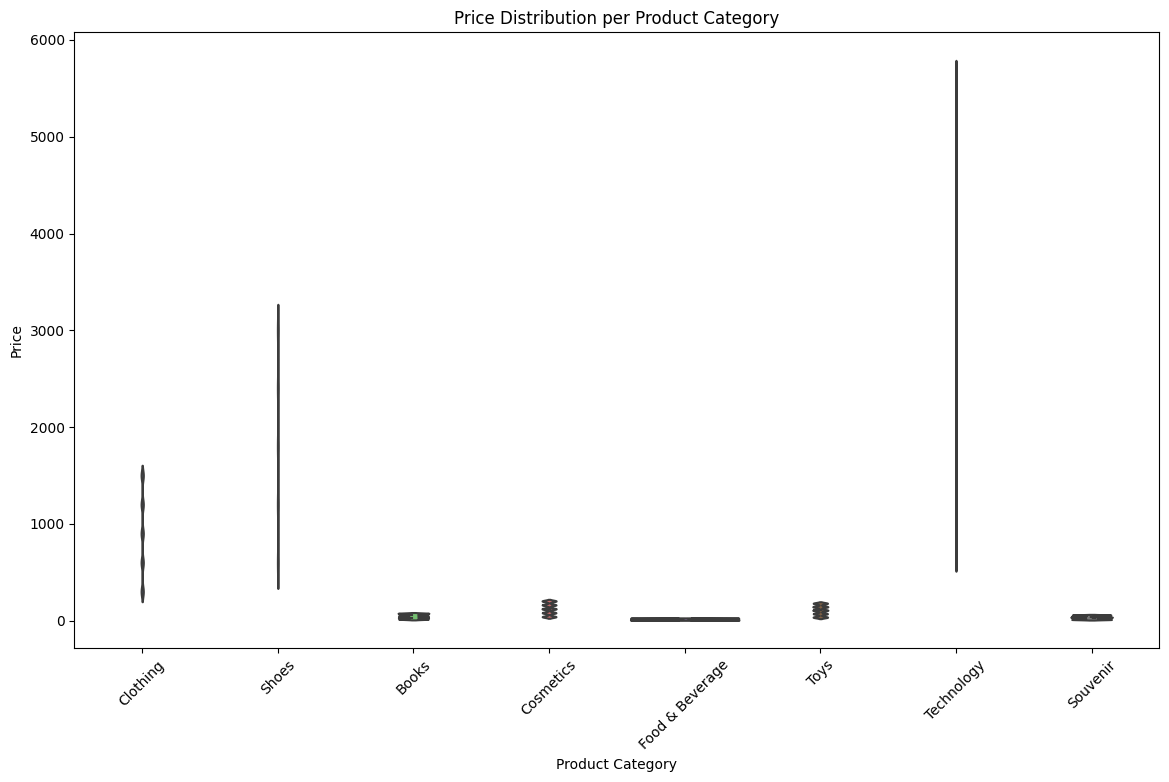

In [76]:
# Violin plot for price distribution per category
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=df, palette='muted', inner='quartile')
plt.title('Price Distribution per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

## Purchase Analysis

### Payment options pie chart

(-1.1040244132726498,
 1.1845794189329626,
 -1.1146040372388022,
 1.1006895683449611)

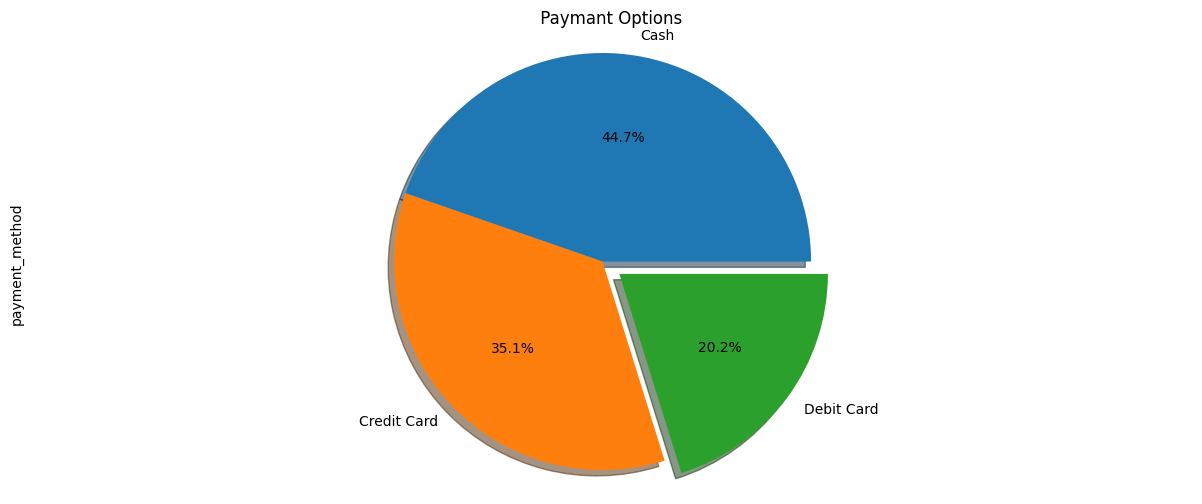

In [77]:
label=["Cash","Credit Card","Debit Card"]
df_payment.plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',shadow=True,labels=label,explode=[0,0,0.1] )
plt.title(' Paymant Options ')
plt.axis('equal')

### Shopping mall distribution pie chart

(-1.1040392888726662,
 1.1848460300354788,
 -1.1005484554488318,
 1.1115175667974695)

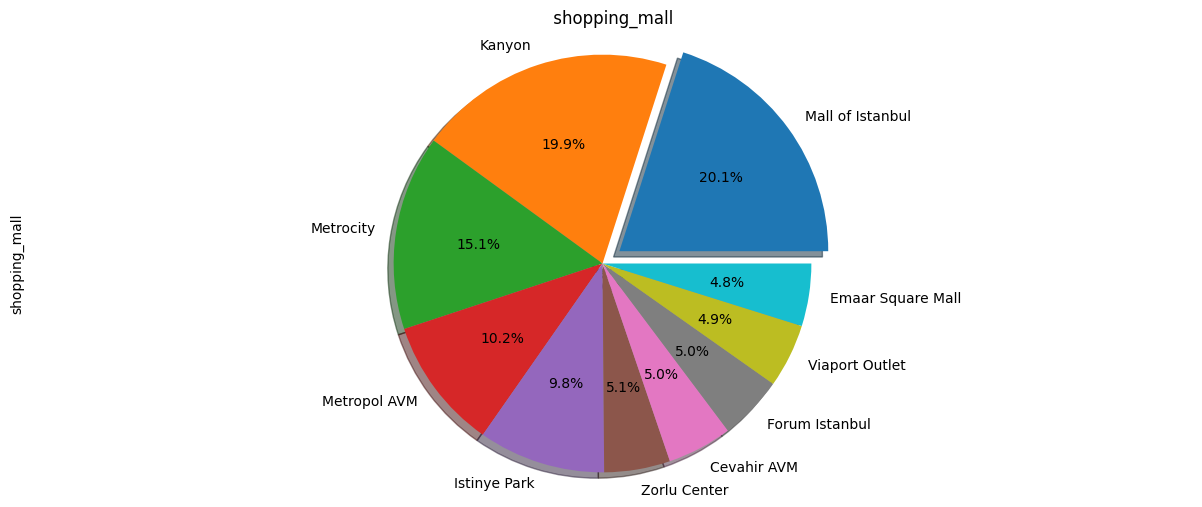

In [78]:
label=['Mall of Istanbul','Kanyon','Metrocity','Metropol AVM','Istinye Park','Zorlu Center','Cevahir AVM','Forum Istanbul','Viaport Outlet','Emaar Square Mall']
df_shopping.plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',shadow=True,labels=label,explode=[0.1,0,0,0,0,0,0,0,0,0] )
plt.title(' shopping_mall')
plt.axis('equal')

### Gender vs. payment method bar plot

(array([0, 1, 2]),
 [Text(0, 0, 'Cash'), Text(1, 0, 'Credit Card'), Text(2, 0, 'Debit Card')])

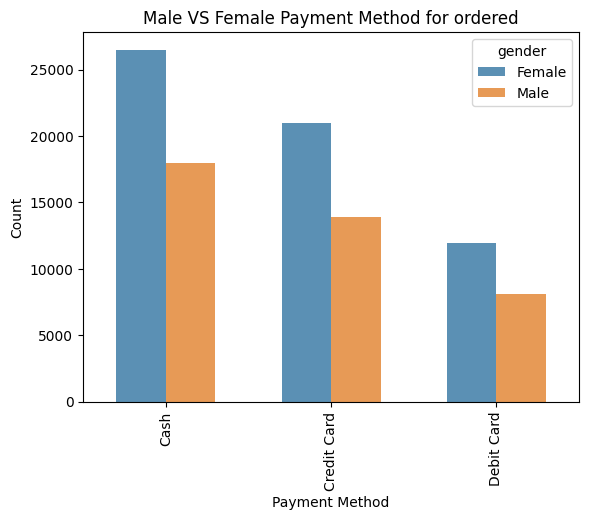

In [79]:
sns.barplot(data=df_PG,x='payment_method',y='count',hue='gender',alpha=0.8,width=0.6)
plt.ylabel('Count')
plt.xlabel('Payment Method')
plt.title('Male VS Female Payment Method for ordered')
plt.xticks(rotation=90)

### Gender vs. category total price spend bar plot

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Cosmetics'),
  Text(3, 0, 'Food & Beverage'),
  Text(4, 0, 'Shoes'),
  Text(5, 0, 'Souvenir'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Toys')])

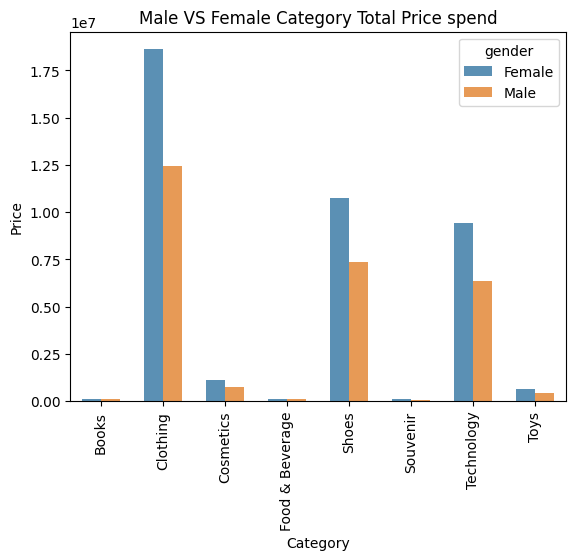

In [80]:
sns.barplot(data=df_category_price,x='category',y='price',hue='gender',alpha=0.8,width=0.6)
plt.ylabel('Price')
plt.xlabel('Category')
plt.title('Male VS Female Category Total Price spend')
plt.xticks(rotation=90)

### Distribution of purchases in each shopping mall

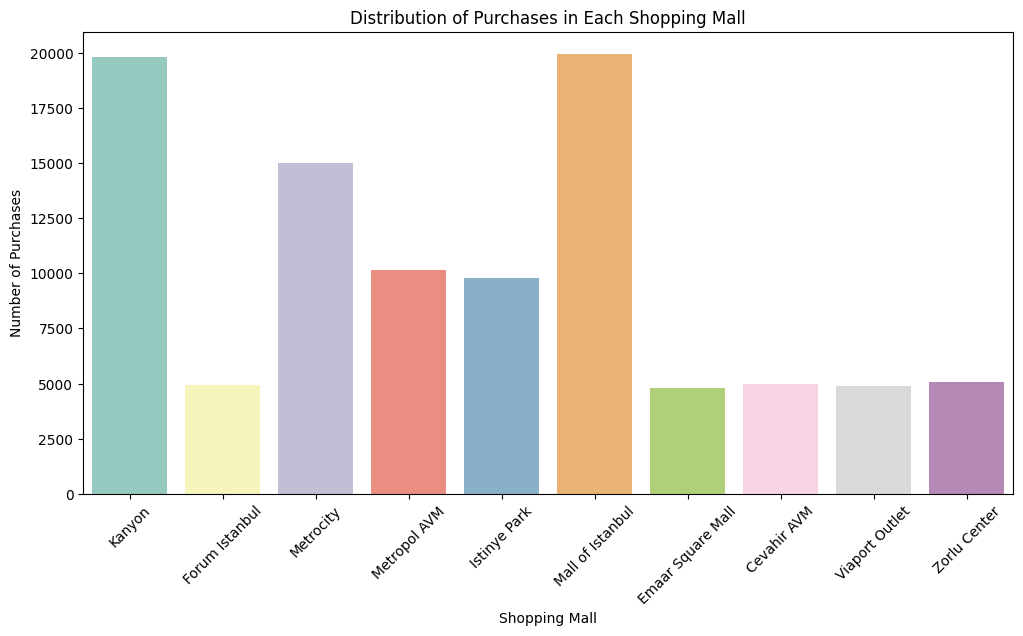

In [81]:
# Bar plot for distribution of purchases in each shopping mall
plt.figure(figsize=(12, 6))
sns.countplot(x='shopping_mall', data=df, palette='Set3')
plt.title('Distribution of Purchases in Each Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

## Transaction Analysis

### Monthly total prices line plot

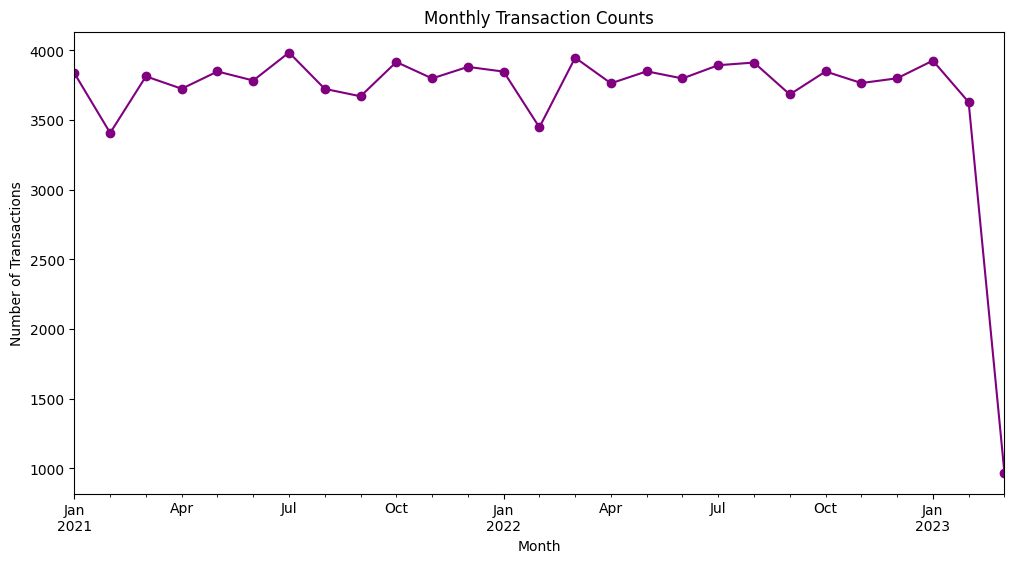

In [83]:
# Convert 'invoice_date' to datetime type if it's not already
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

# Resample data on a monthly basis
monthly_transaction_count = df.resample('M', on='invoice_date').size()

# Line plot for monthly transaction counts
plt.figure(figsize=(12, 6))
monthly_transaction_count.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()



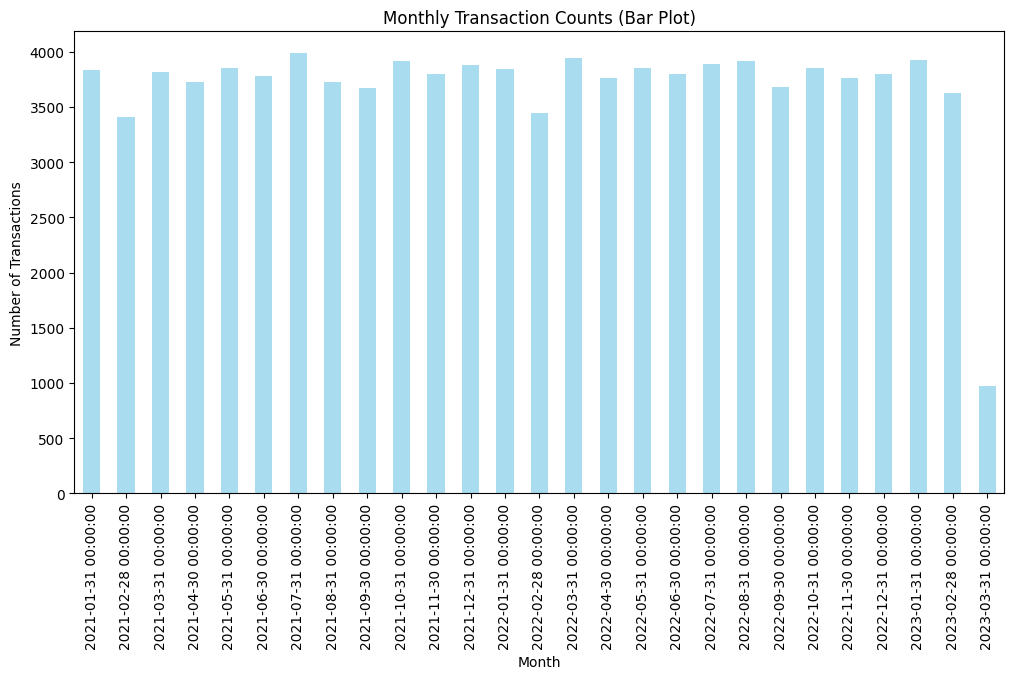

In [84]:
# Bar plot for monthly transaction counts
plt.figure(figsize=(12, 6))
monthly_transaction_count.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Monthly Transaction Counts (Bar Plot)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

## Additional Visualizations

### Quantity vs. price scatter plot

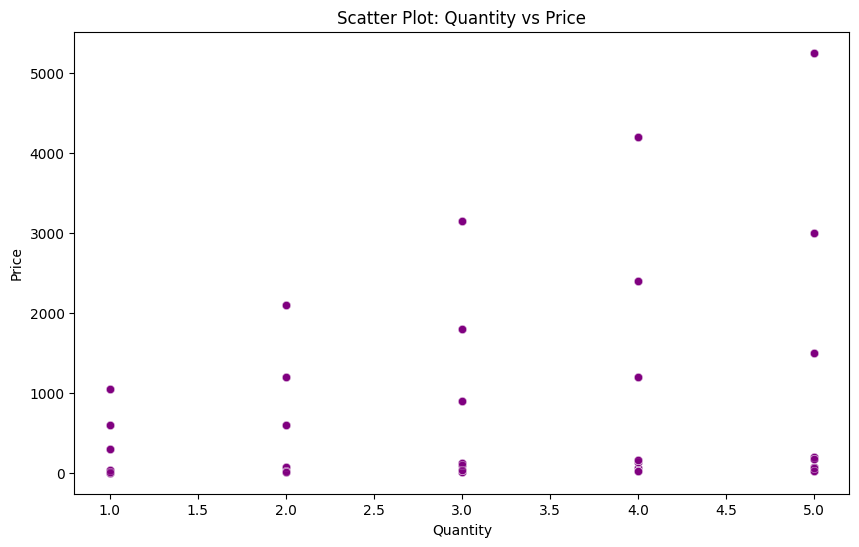

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='price', data=df, color='purple', alpha=0.5)
plt.title('Scatter Plot: Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

### Payment method vs. quantity correlation heatmap

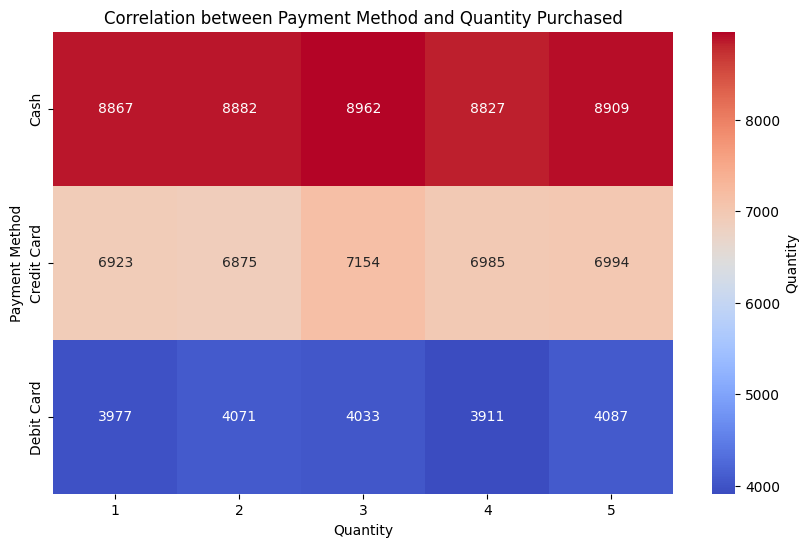

In [88]:
# Creating a pivot table for Payment Method vs Quantity
payment_quantity_pivot = df.pivot_table(index='payment_method', columns='quantity', aggfunc='size', fill_value=0)

# Creating a heatmap to visualize the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(payment_quantity_pivot, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Quantity'})
plt.title('Correlation between Payment Method and Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Payment Method')
plt.show()